# Using scikit-learn

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from epymetheus import Universe, Trade, TradeStrategy

np.random.seed(42)

## Generate toy data

In [2]:
n_bars, n_factors, n_assets = 1000, 3, 100

In [3]:
def ma(shape, weight):
    X = np.random.randn(shape[0] + len(weight), shape[1])
    S = np.zeros(shape)
    for i, w in enumerate(weight):
        S += w * X[i:, :][:shape[0], :]
    return S / sum(weight)

In [4]:
weight = [0.99 ** i for i in range(1000)]

factors = 1 + ma((n_bars, n_factors), weight)
factors /= factors[0, :]

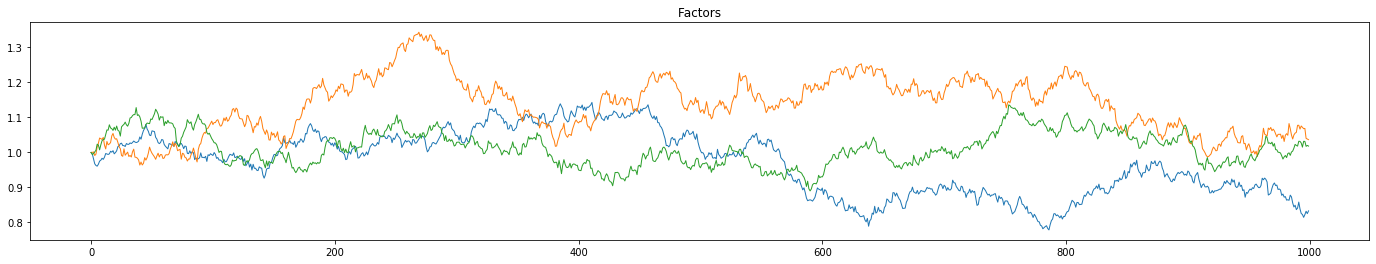

In [5]:
plt.figure(figsize=(24, 4))
plt.plot(factors, lw=1)
plt.title('Factors')
plt.show()

In [6]:
bs = 2 * np.random.random((n_factors, n_assets)) - 1

In [7]:
factor_returns = np.diff(np.log(factors), axis=0, prepend=0)
systs = np.dot(factor_returns, bs)

nonsysts = 0.01 * np.random.randn(n_bars, n_assets)

In [8]:
prices = 100 * np.cumprod(1 + systs + nonsysts, axis=0)

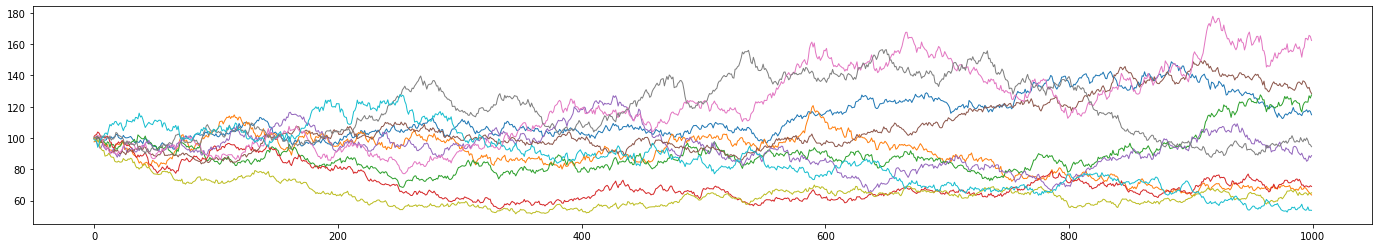

In [9]:
plt.figure(figsize=(24, 4))
plt.plot(prices[:, :10], lw=1)
plt.show()

In [10]:
universe = Universe(prices, 'Factored')

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

returns = np.diff(prices, axis=0)
pca.fit(returns[:1000, :])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
estimated_systs = pca.transform(returns)
estimated_factors = estimated_systs.cumsum(axis=0)

estimated_factors /= estimated_factors.std(axis=0)

In [13]:
# approximate by 10 stocks

reps = np.argsort(pca.components_, axis=1)[:, -1:]
is_rep = np.stack([
    np.isin(np.arange(100), reps[i]) for i in range(3)
]).astype(int)

approx_factors = returns.dot(is_rep.T * pca.components_.T).cumsum(axis=0)
approx_factors /= approx_factors.std(axis=0)

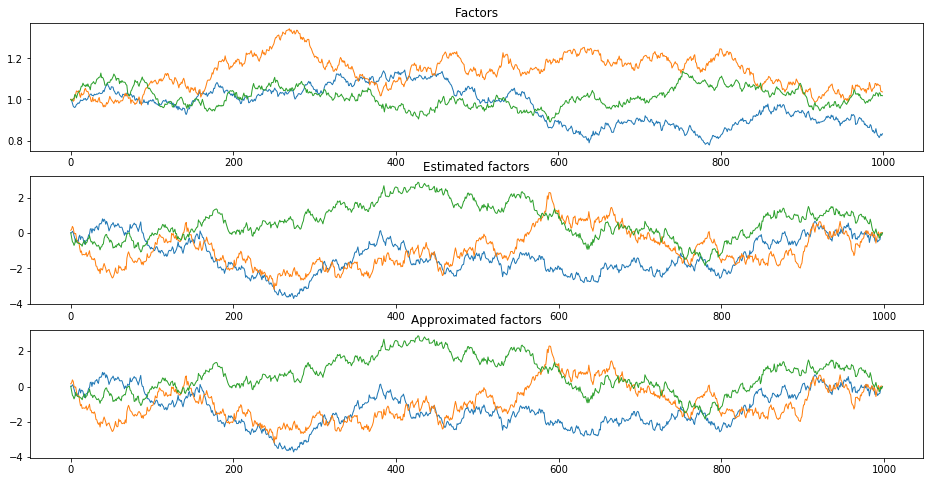

In [14]:
plt.figure(figsize=(16, 8))

plt.subplot(3, 1, 1)
plt.plot(factors, lw=1)
plt.title('Factors')

plt.subplot(3, 1, 2)
plt.plot(estimated_factors, lw=1)
plt.title('Estimated factors')

plt.subplot(3, 1, 3)
plt.plot(estimated_factors, lw=1)
plt.title('Approximated factors')

plt.show()